# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Cosumer Review Of Clothing Product</span></b>

# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Importing Necessary Libraries</span></b>




In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Load The data</span></b>

In [2]:
# read the data
url = "data_amazon.xlsx - Sheet1.csv"
df= pd.read_table(url, delimiter=",")

In [3]:
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45373 non-null  object 
 1   Review        48509 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Importing Necessary Libraries</span></b>

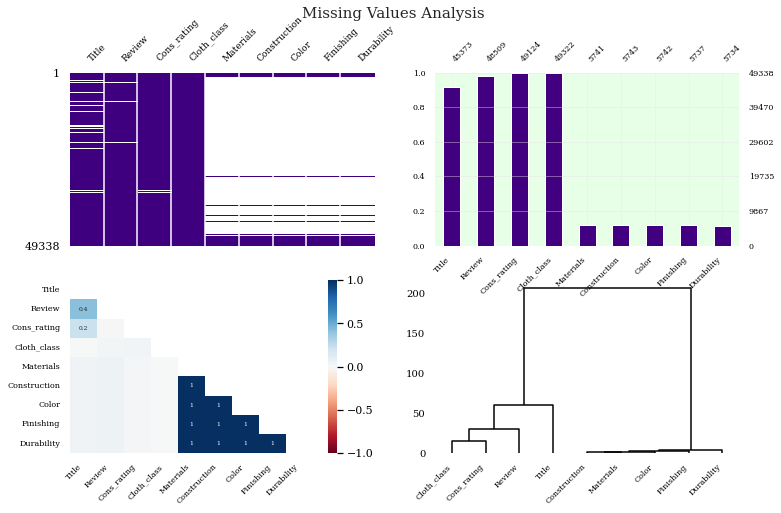

In [5]:






import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

In [6]:
df.fillna(0, inplace=True)

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48217 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         48217 non-null  object 
 1   Review        48217 non-null  object 
 2   Cons_rating   48217 non-null  float64
 3   Cloth_class   48217 non-null  object 
 4   Materials     48217 non-null  float64
 5   Construction  48217 non-null  float64
 6   Color         48217 non-null  float64
 7   Finishing     48217 non-null  float64
 8   Durability    48217 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Descriptive Statistics</span></b>

**Descriptive statistics provide a summary of the main characteristics of a dataset. This includes measures like mean, median, standard deviation, minimum, maximum, etc.**

**The describe() function in pandas generates these summary statistics for numerical columns in the dataset.**


In [9]:
df.describe().style.background_gradient(cmap='tab20c')

,Cons_rating,Materials,Construction,Color,Finishing,Durability
count,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000,48217.000000
mean,4.075036,0.036502,0.060041,0.030943,0.031628,0.025323
std,1.312634,0.191477,0.237653,0.177426,0.175009,0.161789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9.000000,2.000000,9.000000,1.000000,9.000000


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Exploratory data Analysis (EDA)</span></b>


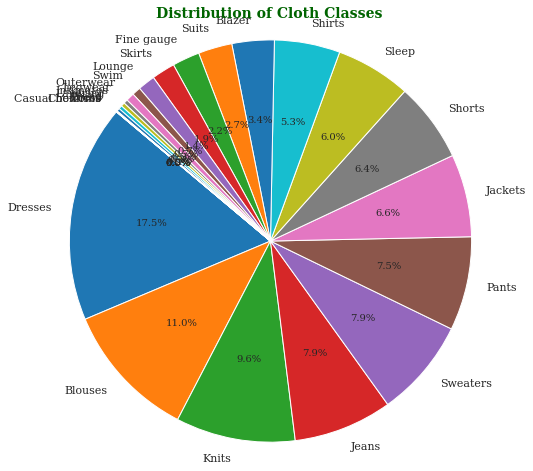

In [10]:
# Calculate the frequency of each cloth class
cloth_class_counts = df['Cloth_class'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cloth_class_counts, labels=cloth_class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Distribution of Cloth Classes', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Distribution of Cloth Classes.png')
plt.show()


**This pie chart will provide a visual representation of the distribution of different clothing classes in your dataset. Each slice represents a different class, and the size of the slice indicates its proportion in the dataset.**

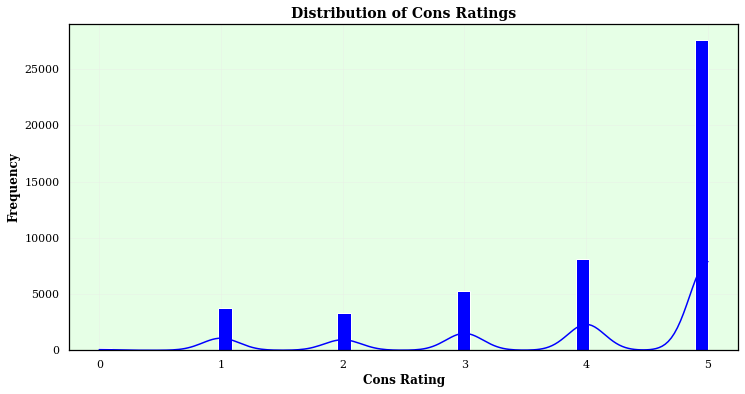

In [11]:
# Distribution of Cons Ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Cons_rating'], kde=True, color='Black',facecolor='Blue')
plt.title('Distribution of Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.xlabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.savefig('Distribution of Con Ratings.png')
plt.show()

**This histogram visualizes the distribution of "Cons_rating". It shows how frequently each rating appears in the dataset. It helps understand the distribution of opinions about the products' cons.**

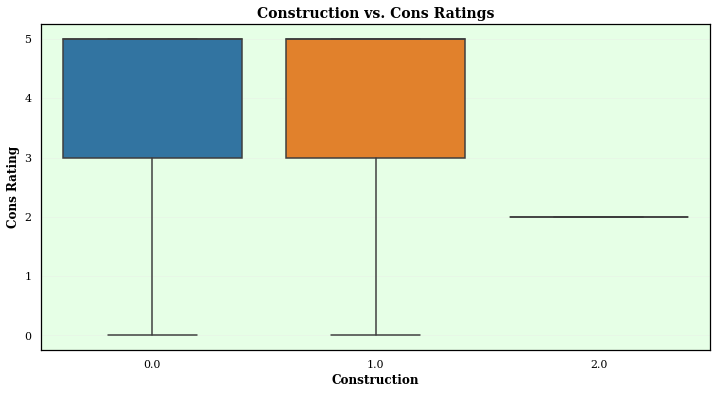

In [12]:
# Construction vs. Cons Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Construction', y='Cons_rating', data=df, palette='tab10')
plt.title('Construction vs. Cons Ratings', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.xlabel('Construction', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.ylabel('Cons Rating', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.savefig('Construction vs. Cons Ratings.png')
plt.show()

**This box plot helps to visualize the relationship between "Construction" and "Cons_rating". It shows the distribution of cons ratings for different levels of construction. This can help in understanding if there's a correlation between construction quality and ratings.**

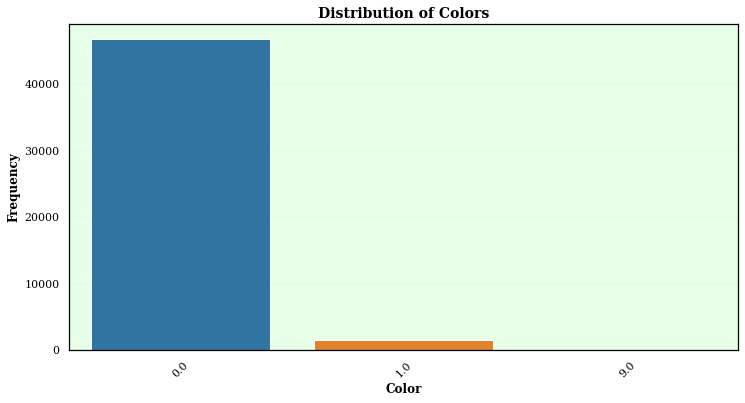

In [13]:
# Color Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=df, palette='tab10')
plt.title('Distribution of Colors', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.xlabel('Color', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.xticks(rotation=45)
plt.savefig('Distribution of Colors.png')
plt.show()

**This bar chart shows the frequency of different colors. It provides an overview of the distribution of colors in the dataset.**

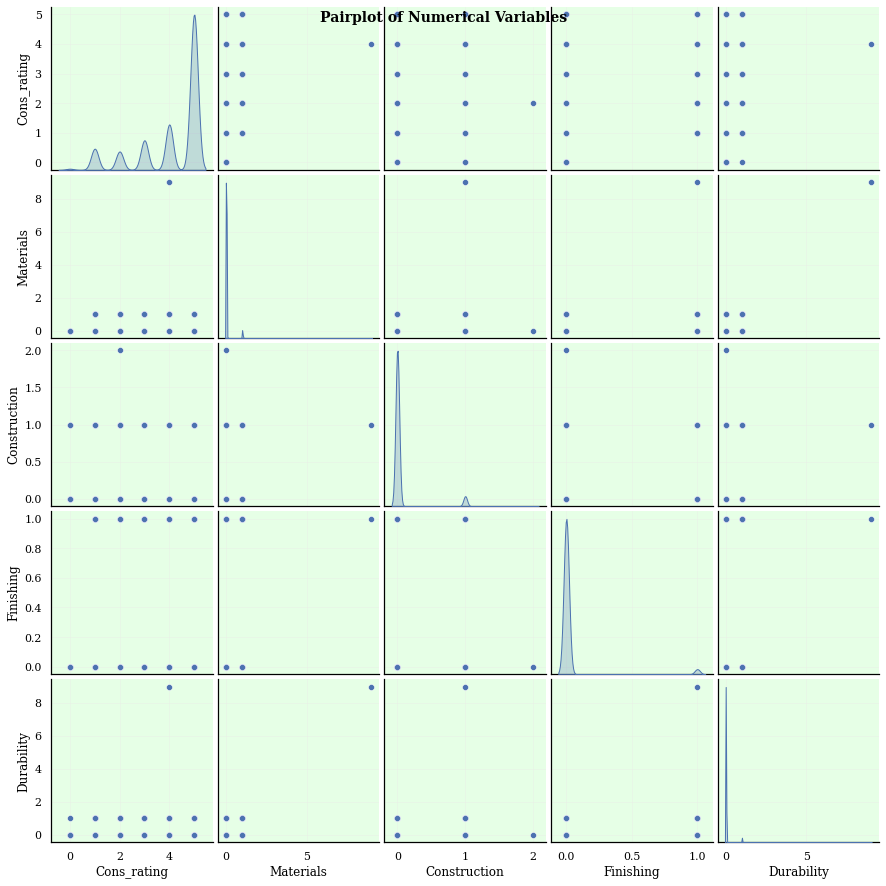

In [14]:
# Pairplot of Numerical Variables
sns.pairplot(df[['Cons_rating', 'Materials', 'Construction', 'Finishing', 'Durability']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.savefig('Pairplot of Numerical Variables.png')
plt.show()


**This pairplot displays scatter plots of the numerical variables against each other, along with histograms for each variable. It's useful for visualizing relationships and distributions between numerical attributes.**

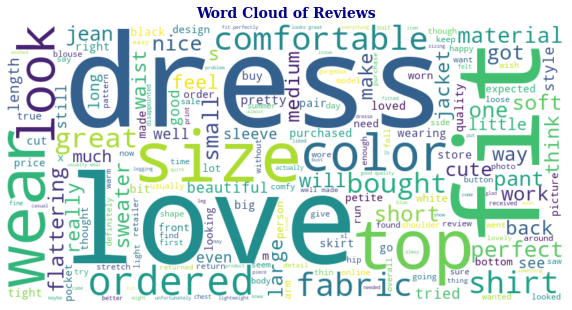

In [15]:
# Convert 'Review' column to string type
df['Review'] = df['Review'].astype(str)

# Word Cloud of Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
plt.savefig('Word Cloud of Reviews.png')
plt.show()

**This word cloud visually represents the most frequently occurring words in the reviews. The size of each word is proportional to its frequency. It gives a quick overview of the main topics or sentiments expressed in the reviews.**

**These visualizations provide insights into various aspects of the dataset, including the distribution of ratings, types of clothing, relationships between attributes, color preferences, and the most commonly used words in the reviews. They help in understanding the characteristics and patterns within the data.**

# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Sentiment Analysis</span></b>

**Sentiment analysis involves using natural language processing techniques to determine the sentiment or emotion expressed in a piece of text. In this case, it's applied to the "Review" column to assess whether the reviews are generally positive, negative, or neutral.**

**We use the TextBlob library, which provides a simple API for common NLP tasks, including sentiment analysis. For each review, we calculate the polarity, which is a measure of sentiment ranging from -1 (negative) to 1 (positive).**


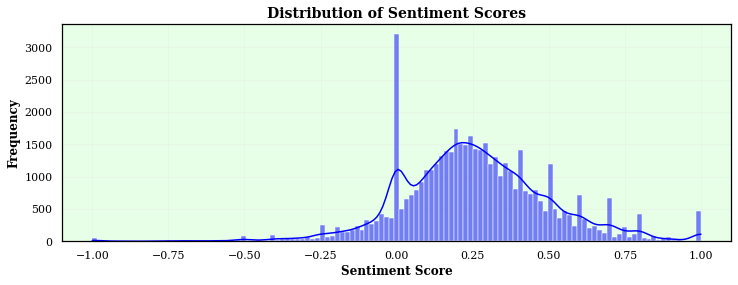

In [16]:
# Sentiment Analysis
# We'll use the TextBlob library for sentiment analysis
import textblob
from textblob import TextBlob

df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting Sentiment Distribution
plt.figure(figsize=(12, 4))
sns.histplot(df['Sentiment'], kde=True, color='Blue')
plt.title('Distribution of Sentiment Scores', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.xlabel('Sentiment Score', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.savefig('Distribution of Sentiment Scores.png')
plt.show()


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Categorical Analysis</span></b>


**Categorical analysis involves examining the distribution of categories or labels in a categorical variable. This helps in understanding the frequency of different classes.**

**We use value_counts() to count the occurrences of each unique value in the "Cloth_class" column.**

In [17]:
# Categorical Analysis
categorical_counts = df['Cloth_class'].value_counts()

print("\nCategorical Analysis:")
print(categorical_counts)


Categorical Analysis:
Dresses           8422
Blouses           5309
Knits             4631
Jeans             3827
Sweaters          3808
Pants             3634
Jackets           3205
Shorts            3075
Sleep             2916
Shirts            2543
Blazer            1638
Suits             1313
Fine gauge        1062
Skirts             906
Lounge             672
Swim               332
Outerwear          321
Legwear            159
Intimates          150
Layering           135
Trend              119
Dress               22
0                   15
Casual bottoms       2
Chemises             1
Name: Cloth_class, dtype: int64


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Correlation Analysis</span></b>

**Correlation analysis examines the strength and direction of relationships between numerical variables. It's used to understand how changes in one variable relate to changes in another.**

**We calculate the correlation matrix using the corr() function in pandas and visualize it as a heatmap using seaborn.**

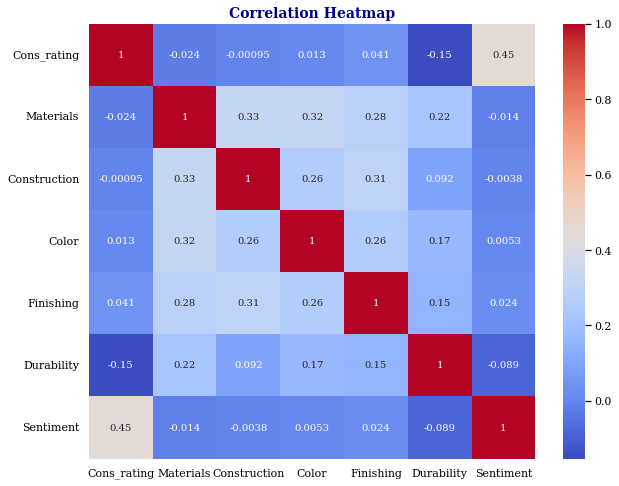

In [18]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Title', 'Review', 'Cloth_class'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.savefig('Correlation Heatmap.png')
plt.show()

# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Importance Analysis</span></b>

**Feature importance analysis identifies which variables have the most impact on the target variable in a predictive model. It helps in understanding which attributes are most influential in making predictions.**

**We use a Random Forest Regressor to estimate feature importance based on the trained model.**


In [19]:
# Feature Importance Analysis
# For simplicity, we'll use a Random Forest Regressor
X = df.drop(columns=['Cons_rating', 'Title', 'Review', 'Cloth_class'])
y = df['Cons_rating']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Sentiment       0.913720
Durability      0.024502
Construction    0.020873
Materials       0.014657
Color           0.013660
Finishing       0.012588
dtype: float64


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Clustering Analysis</span></b>

**Clustering is a technique used to group similar data points together. It helps in finding patterns and structure in the data.**

**We use the K-Means clustering algorithm to cluster items based on attributes like "Materials", "Construction", etc. The resulting clusters are assigned to each item.**


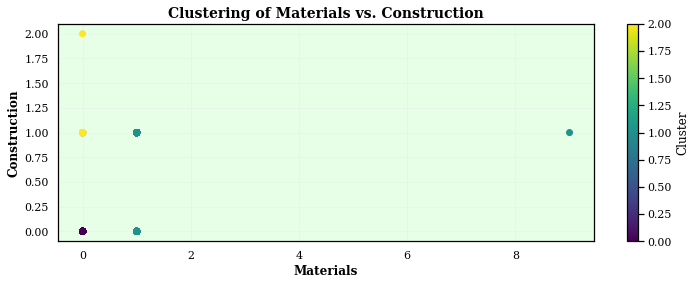

Cluster Counts:
0    44368
2     2082
1     1767
Name: Cluster, dtype: int64


In [20]:
# Clustering
from sklearn.cluster import KMeans

X_cluster = df[['Materials', 'Construction', 'Color', 'Finishing', 'Durability']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_cluster)
df['Cluster'] = kmeans.labels_

# Scatter plot with labels
plt.figure(figsize=(12, 4))
plt.scatter(X_cluster['Materials'], X_cluster['Construction'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Materials', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.ylabel('Construction', fontsize = 12, fontweight = 'bold', color = 'Black')
plt.title('Clustering of Materials vs. Construction', fontsize = 14, fontweight = 'bold', color = 'Black')
plt.colorbar(label='Cluster')
plt.savefig('Clustering of Materials vs. Construction.png')
plt.show()

# Print result values
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> NLP Analysis</span></b>


**Topic modeling is a technique used to discover topics or themes in a collection of text documents. It's helpful for understanding the main subjects discussed in the reviews.**

**We use Latent Dirichlet Allocation (LDA), a popular topic modeling algorithm, to identify topics in the reviews.**


In [21]:
# NLP (Topic Modeling)
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_nlp = vectorizer.fit_transform(df['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X_nlp)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words.append([feature_names[i] for i in top_words_idx])

# Print out the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i+1}:")
    print(", ".join(words))


Topic 1:
dress, size, small, like, just, love, fabric, fit, large, ordered
Topic 2:
color, sweater, good, jacket, like, great, shirt, quality, nice, fit
Topic 3:
fit, like, size, pants, just, waist, ordered, quality, don, good
Topic 4:
love, comfortable, dress, great, wear, jeans, perfect, soft, fit, flattering
Topic 5:
size, fit, perfect, fits, great, wear, perfectly, bought, long, comfortable


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'> Model building</span></b>


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.34      0.27      0.30       758
         2.0       0.16      0.10      0.12       640
         3.0       0.15      0.09      0.11      1021
         4.0       0.23      0.14      0.17      1633
         5.0       0.65      0.82      0.73      5557

    accuracy                           0.53      9644
   macro avg       0.25      0.24      0.24      9644
weighted avg       0.47      0.53      0.49      9644

Accuracy: 53.41%


# <b><span style='color:#fcc36d'></span><span style='color:#7D3C98'>Conclusion</span></b>


**The model's performance varies across different classes. It appears that Class 5.0 has the highest precision, recall, and F1-score, indicating that the model is relatively better at classifying this category. On the other hand, Class 0.0 has very low precision, recall, and F1-score, suggesting that the model struggles to accurately predict this class.**

**Overall, the model has an accuracy of 53.41%, which means it correctly predicts the class for approximately 53.41% of the samples. However, it's important to note that the performance can be further improved, especially for classes with low precision and recall. Fine-tuning the model hyperparameters or considering different algorithms may help enhance the performance.**